In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.special
import math as mt
from scipy.interpolate import interp1d

In [2]:
interv = 6
n= 1000
class Funcoes:
#    def __init__(self,n):
#        self.n = n

    def uniform (y):
        x = np.linspace(-interv, interv, num=n)
        y = np.linspace(y,y, num=n)
        return (x,y)
    
    def gauss (𝜎, 𝜇):
        x = np.linspace(-interv, interv, num=n)
        y = ((1/(𝜎*np.sqrt(2*np.pi)))*np.exp(-(((x-𝜇)**2)/(2*𝜎**2))))
        return (x,y)

    def exp ():
        x = np.linspace(-interv, interv, num=n)
        y = np.exp(x)
        return (x,y) 
    
    def poisson (𝜆): 
        n = 100
        x = np.linspace(0, 30, num=n)
        y = (np.exp(-𝜆)) * ((np.power(𝜆,x)/ scipy.special.factorial(x)))
        return (x, y)

(array([ 51.,  83., 111., 112., 181., 167., 147.,  81.,  57.,  10.]),
 array([0.00948706, 0.10850882, 0.20753058, 0.30655234, 0.4055741 ,
        0.50459586, 0.60361763, 0.70263939, 0.80166115, 0.90068291,
        0.99970467]),
 <BarContainer object of 10 artists>)

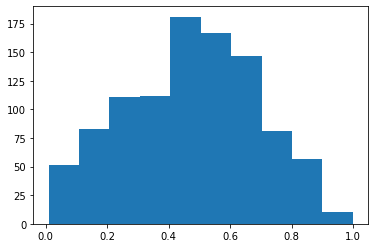

In [3]:
g = Funcoes.gauss(1,0)
t = np.linspace(-5,5,1000)
y = np.cumsum(g[1])
x = np.random.uniform (0,1, 1000)
z = interp1d(y,x)
plt.hist(z(x))

In [4]:
def interpolation(t,y,x):
    coef = []
    
    for i in range(np.size(x)-1):
        j = i + 1   
        aa = (y[i+1]-y[i])/(x[i+1]- x[i])
        bb = y[i] - aa*x[i]
        coef.append([aa,bb])
    print(np.size(coef[0]))
    q = []
    for i in range (np.size(t)):
        for j in range (np.size(x)-1):
            if x[j] < t [i] and  t[i] < x[j+1]:
                qq = (coef[j][0]) * t[i] + (coef[j][1])
                q.append(qq)
    return (q)

In [5]:
z = np.linspace ((-interv +1), (interv -1), n)
l=100

def somarmn (z,y,x):
    s = np.size(z)
    v = interpolation(x,y,z)
    deltax = ((z[s-1])-z[0])/s
    b = []
    bb = 0
    for i in range (s): #### retirei o l-1
        bb += y[i]*deltax
        b.append(bb)
    return (b)



In [6]:

def random ():
    ttt = np.linspace(0,1,n)
    t=[]
    for i in range(np.size(ttt)):
        mmm = np.random.choice(ttt)
        t.append(mmm)
    return t



In [7]:
class Sample:
    
    def gaussian (𝜎, 𝜇):
        y = Funcoes.gauss(𝜎, 𝜇)
        t = np.linspace ((-interv +1), (interv -1), n)
#        inter = interpolation (t, y[1], y[0])  
        cumulativa = somarmn(t, y[1], y[0])
        unif = random ()
        f = interpolation(unif, y[0], cumulativa)
        return (f)
     
    def uniforme ():
        y = Funcoes.uniform (2)
        t = np.linspace ((-interv +1), (interv -1), n)
        cumulativa = somarmn(t, y[1], y[0])
        unif = random ()
        f = interpolation(unif, y[0], cumulativa)
        return (f)
    
    def exp ():
        y = Funcoes.exp()
        t = np.linspace ((-interv +1), (interv -1), n)
        cumulativa = somarmn(t, y[1], y[0])
        unif = random ()
        f = interpolation(unif, y[0], cumulativa)
        return (f)
    
    def poisson (𝜆):
        y = Funcoes.poisson(𝜆)
        t = np.linspace (0, 29.9, 100)
        cumulativa = somarmn(t, y[1], y[0])
        unif = random ()
        f = interpolation(unif, y[0], cumulativa)
        return (f)

2
2


<ipython-input-4-cee5f7cc3b9a>:6: RuntimeWarning: divide by zero encountered in double_scalars
  aa = (y[i+1]-y[i])/(x[i+1]- x[i])


982

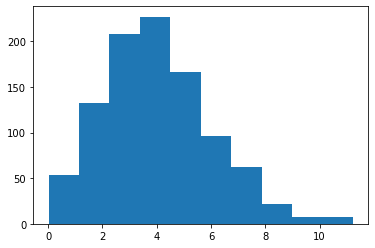

In [8]:
f = Sample.poisson(4)
plt.hist(f)
np.size(f)
#plt.plot(f[0],f[1])
